In [3]:
import pandas as pd

# Loading cleaned historical sales
cleaned_sales = pd.read_csv(r"C:\Users\cleaned_sales.csv", parse_dates=['InvoiceDate'])
cleaned_sales = cleaned_sales.set_index('InvoiceDate')

# Sum sales per month
df_monthly = cleaned_sales['TotalSales'].resample('MS').sum()


In [4]:
df_monthly = df_monthly.fillna(0)


In [6]:
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Assign correct monthly dates to forecast
forecast_index = pd.date_range(start=df_monthly.index[-1] + pd.offsets.MonthBegin(), 
                               periods=forecast_steps, freq='MS')
forecast = pd.Series(forecast.values, index=forecast_index)


In [7]:
combined = pd.concat([df_monthly, forecast])
combined = combined.to_frame(name='TotalSales')
combined['Type'] = ['Historical']*len(df_monthly) + ['Forecast']*len(forecast)


In [8]:
combined.to_csv("C:/path/historical_forecast.csv", index=True)


OSError: Cannot save file into a non-existent directory: 'C:\path'

In [13]:
import pandas as pd


cleaned_sales = pd.read_csv(r"C:\Users\cleaned_sales.csv", parse_dates=['InvoiceDate'])


monthly_sales = cleaned_sales.groupby(pd.Grouper(key='InvoiceDate', freq='MS'))['TotalSales'].sum()


all_months = pd.date_range(start=monthly_sales.index.min(), 
                           end=monthly_sales.index.max(), freq='MS')

# Reindexing to fill missing months with 0
monthly_sales = monthly_sales.reindex(all_months, fill_value=0)


19:42:11 - cmdstanpy - INFO - Chain [1] start processing
19:42:31 - cmdstanpy - INFO - Chain [1] done processing


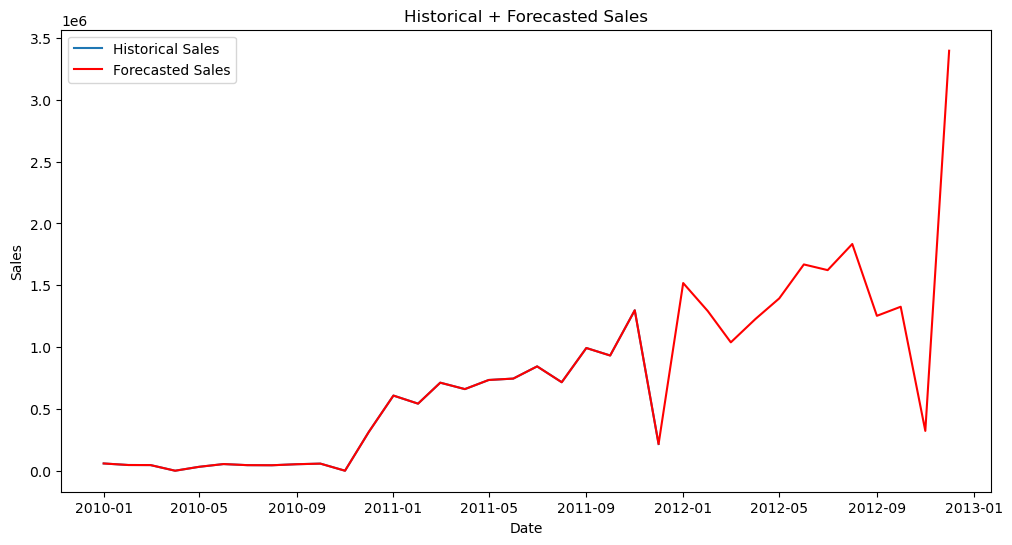

In [15]:

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\cleaned_sales.csv", parse_dates=['InvoiceDate'])

df_monthly = df.groupby(pd.Grouper(key='InvoiceDate', freq='MS'))['TotalSales'].sum().reset_index()


df_prophet = df_monthly.rename(columns={'InvoiceDate': 'ds', 'TotalSales': 'y'})

model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=12, freq='MS')

forecast = model.predict(future)

plt.figure(figsize=(12,6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Historical Sales')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Historical + Forecasted Sales')
plt.legend()
plt.show()



In [16]:
forecast.to_csv("forecasted_sales_prophet.csv", index=False)